In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs
from sklearn.metrics import f1_score
import pickle
from sklearn import metrics

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv'

In [3]:
ads_dataset=pd.read_csv(url)

In [4]:
ads_dataset.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
ads_dataset.shape

(200, 5)

# Exploratory Data Analysis

The Dataset is pretty small, Unnamed isn't useful in determinng the sales as it is serial number of the data so dropping the unnamed column

In [6]:
ads_dataset.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
ads_dataset.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [8]:
ads_dataset.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
#checking the datatypes
ads_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
#checking for null values
ads_dataset.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Observation:
1. Zero nullvalues in the dataset
2. All are numerical data

In [11]:
ads_dataset.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

<AxesSubplot:xlabel='TV', ylabel='sales'>

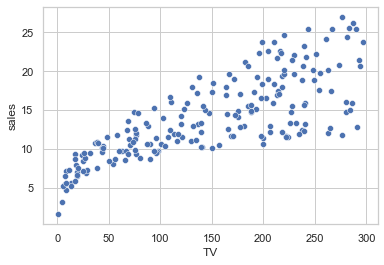

In [12]:
sns.set(style='whitegrid')
sns.scatterplot(x='TV',y="sales",data=ads_dataset)

<AxesSubplot:xlabel='radio', ylabel='sales'>

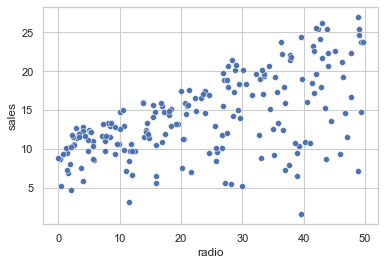

In [13]:
sns.set(style='whitegrid')
sns.scatterplot(x='radio',y="sales",data=ads_dataset)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

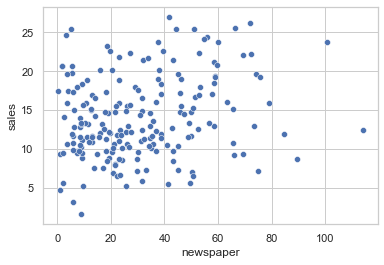

In [14]:
sns.set(style='whitegrid')
sns.scatterplot(x='newspaper',y="sales",data=ads_dataset)

<AxesSubplot:xlabel='TV', ylabel='sales'>

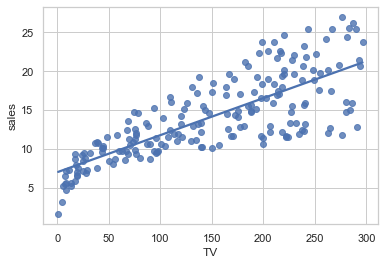

In [15]:
sns.regplot(x = "TV", y = "sales", ci = None, data = ads_dataset)

<AxesSubplot:xlabel='radio', ylabel='sales'>

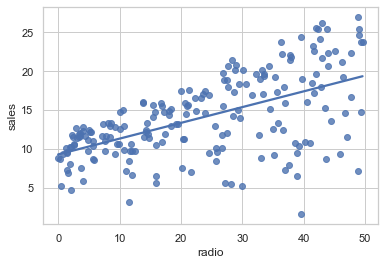

In [16]:
sns.regplot(x = "radio", y = "sales", ci = None, data = ads_dataset)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

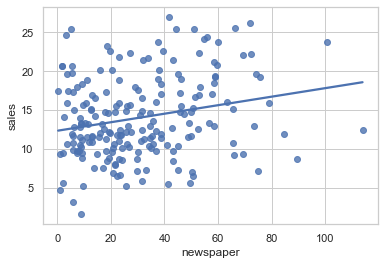

In [17]:
sns.regplot(x = "newspaper", y = "sales", ci = None, data = ads_dataset)

Oberservation:
1. Regression line for TV ads vs sales : by observing the line we can the TV ads are directly proportional to sales
2. Regression line for radio ads vs sales : by observing the line we can the radio ads are directly proportional to sales but the higher ads invest is worth as it is not increasing the sales at that drastically as it goes higher
3. Regression line for newspaper ads vs sales : by observing the line we can't surely say that the newspaper ads effecting the sales the higher most of the data is scattered

TV
-0.06932836662244649


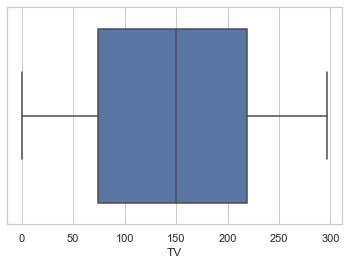

radio
0.0934668451108453


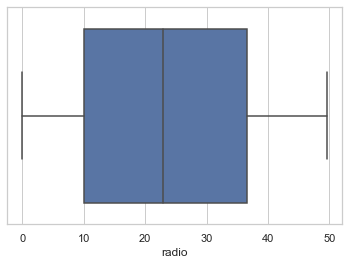

newspaper
0.8879959753085498


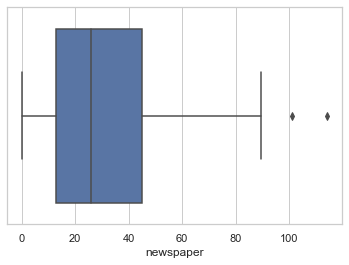

sales
0.4045082487061191


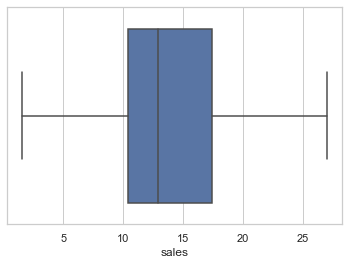

In [18]:
for col in ads_dataset:
    print(col)
    print(skew(ads_dataset[col]))
    plt.figure()
    sns.boxplot(ads_dataset[col])
    plt.show()

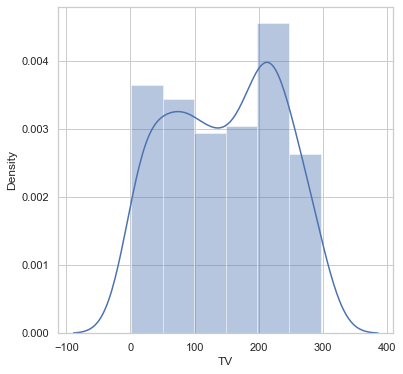

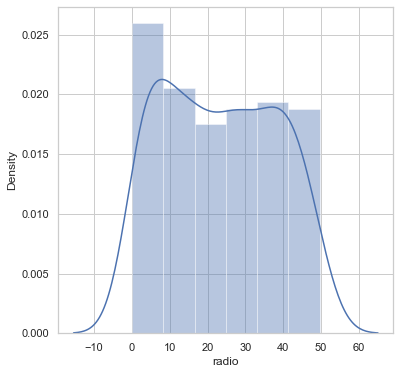

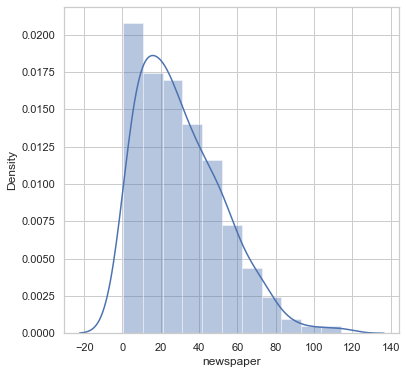

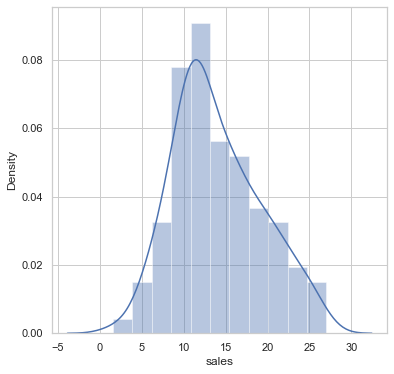

In [19]:
for col in ads_dataset:
    plt.figure(figsize=(6,6))
    sns.distplot(ads_dataset[col])
    plt.show()

Removing outliers

In [20]:
#arresting the outliers using IQR method
#Age
Q1=ads_dataset['newspaper'].quantile(0.25)
Q3=ads_dataset['newspaper'].quantile(0.75)
IQR_newspaper=Q3-Q1
whisker_width = 1.5
news_outliers = ads_dataset[(ads_dataset['newspaper'] < Q1 - whisker_width*IQR_newspaper) | (ads_dataset['newspaper'] > Q3 + whisker_width*IQR_newspaper)]
lower_whisker = Q1 -(whisker_width*IQR_newspaper)
upper_whisker = Q3 + (whisker_width*IQR_newspaper)
ads_dataset['newspaper']=np.where(ads_dataset['newspaper']>upper_whisker,upper_whisker,np.where(ads_dataset['newspaper']<lower_whisker,lower_whisker,ads_dataset['newspaper']))

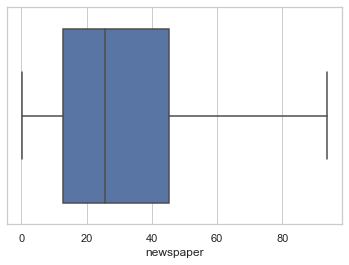

In [21]:
plt.figure()
sns.boxplot(ads_dataset['newspaper'])
plt.show()

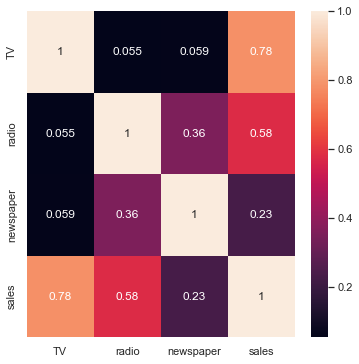

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(ads_dataset.corr(), annot=True)
plt.show()

correlation between TV and radio is good compared to newspaper i.e. w.r.t the sales

# Model Training and Prediction 

In [23]:
X=ads_dataset.drop(columns=['sales'])
Y=ads_dataset['sales']

In [24]:
#checking VIF value 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

     feature       VIF
0         TV  2.500402
1      radio  3.304735
2  newspaper  3.115816


All VIF values are below 5 

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.15, random_state=15)

In [67]:
lin_r=LinearRegression()
rfr=RandomForestRegressor()
dtc=DecisionTreeRegressor()

In [68]:
parameter_lin={ 'fit_intercept':['bool','True'],
                'normalize':['bool','False'],
                'copy_X':['bool','True'],
                'n_jobs':[10,20,30,40,50],
                'positive':['bool','False']}

parameter_rfr={
         'n_estimators': [10, 17, 33, 48, 80],
         'max_features': ['auto', 'sqrt'],
         'max_depth': [2,4,6],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2],
         'bootstrap': [True, False]
         
}

parameter_dtr={
            'criterion': ['mse','friedman_mse','mae','poisson'],
            'splitter':['best','random'],
            'max_depth': [2,4,6,7,9,10],
            'min_samples_split': [2, 5, 6],
            'min_samples_leaf': [1,2],
            'max_features': ['auto', 'sqrt','log2'],
}

In [35]:
lin_r_rs=rs(lin_r,param_distributions=parameter_lin,cv=5, verbose=True)
lin_r_rs.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': ['bool', 'True'],
                                        'fit_intercept': ['bool', 'True'],
                                        'n_jobs': [10, 20, 30, 40, 50],
                                        'normalize': ['bool', 'False'],
                                        'positive': ['bool', 'False']},
                   verbose=True)

In [72]:
lin_r_rs.best_estimator_

LinearRegression(copy_X='bool', fit_intercept='True', n_jobs=20,
                 normalize='bool', positive='bool')

In [60]:
rfr_gs= gs(estimator =rfr, param_grid=parameter_rfr,cv=3, verbose=2, n_jobs=4)
rfr_gs.fit(X_train,Y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 17, 33, 48, 80]},
             verbose=2)

In [71]:
rfr_gs.best_estimator_

RandomForestRegressor(max_depth=6, n_estimators=33)

In [69]:
dtc_rs=rs(dtc,param_distributions=parameter_dtr,cv=5, verbose=True)
dtc_rs.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 4, 6, 7, 9, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 6],
                                        'splitter': ['best', 'random']},
                   verbose=True)

In [70]:
dtc_rs.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      max_features='auto', min_samples_leaf=2,
                      min_samples_split=5)

In [73]:
lr_model=LinearRegression(copy_X='bool', fit_intercept='True', n_jobs=20,
                 normalize='bool', positive='bool')
rfr_model=RandomForestRegressor(max_depth=6, n_estimators=33)
dtr_model=DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      max_features='auto', min_samples_leaf=2,
                      min_samples_split=5)

In [83]:
lr_model.fit(X_train,Y_train)
rfr_model.fit(X_train,Y_train)
dtr_model.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      max_features='auto', min_samples_leaf=2,
                      min_samples_split=5)

In [75]:
lr_pred=lr_model.predict(X_test)
rfr_pred=rfr_model.predict(X_test)
dtr_pred=dtr_model.predict(X_test)

In [80]:
print('\033[1m Linear Regression accuracy:  \033[1m',lin_r_rs.best_score_)
print('\033[1m Random Forest Regressor accuracy:  \033[1m',rfr_gs.best_score_) 
print('\033[1m Decision Tree Regressor accuracy: \033[1m ',dtc_rs.best_score_) 

 Linear Regression accuracy:   0.8712022953728422
 Random Forest Regressor accuracy:   0.9715726126752106
 Decision Tree Regressor accuracy:   0.9338345312874999


Random Forest Regressor has the most accuracy compared to other two models

In [84]:
#saving the model
random_forest_model=pickle.dumps(rfr_model)